In [26]:
file_names = [
    # "afraid_vs_terrified",
    # "content_vs_hopeful",
    # "hopeful_vs_terrified",
    # "sad_vs_anxious",
    "sad_vs_sad"
]


for file_name in file_names:
  # Specify the file path
  file_path = f'/content/drive/MyDrive/LLM Interpretability/datasets/{file_name}.csv' # Replace with your actual file path

  # print(file_name)
  df = pd.read_csv(file_path)  # Assuming a CSV file, change function for other formats
  df = df[df["llm_decision"] == "yes"]
  df.shape

  type_frequencies = df['type'].value_counts()
  # print("Frequency of each type:")
  # print(type_frequencies)
df.head(5)

,type,layer,class1,class2,Neuron_ID,Contribution,Explanation,llm_decision
196,att,22,sad,sad,9418,179776.0,attends to emotional tokens from sorrow-relat...,yes
735,mlp,22,sad,sad,3164,16384.0,references to the concept of challenges or con...,yes
753,mlp,18,sad,sad,4011,15376.0,expressions of sadness or loss,yes
803,mlp,17,sad,sad,8719,11881.0,references to death and dying,yes
814,res,15,sad,sad,13368,11664.0,elements related to internal strength and emot...,yes


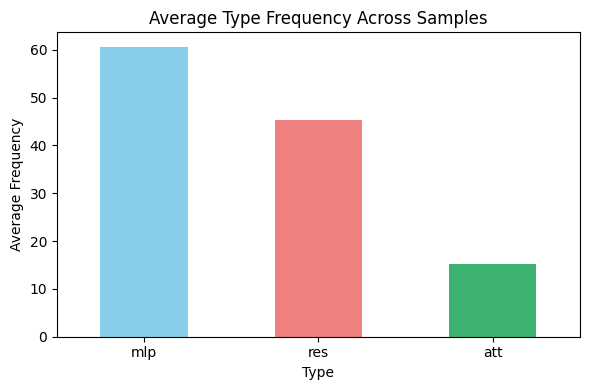

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

file_names = [
    "afraid_vs_terrified",
    "content_vs_hopeful",
    "hopeful_vs_terrified",
    "sad_vs_anxious",
    "sad_vs_sad"
]

# Initialize counter
total_counts = pd.Series({'mlp': 0, 'res': 0, 'att': 0}, dtype=int)

# Process each file and accumulate type frequencies
for file_name in file_names:
    file_path = f'/content/drive/MyDrive/LLM Interpretability/datasets/{file_name}.csv'
    df = pd.read_csv(file_path)
    df = df[df["llm_decision"] == "yes"]

    counts = df['type'].value_counts().reindex(['mlp', 'res', 'att'], fill_value=0)
    total_counts += counts

# Compute average
average_counts = total_counts / len(file_names)

# Plot
plt.figure(figsize=(6, 4))
average_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'mediumseagreen'])
plt.title('Average Type Frequency Across Samples')
plt.xlabel('Type')
plt.ylabel('Average Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


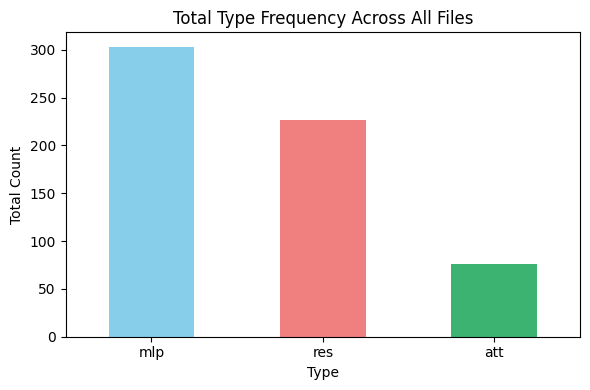

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

file_names = [
    "afraid_vs_terrified",
    "content_vs_hopeful",
    "hopeful_vs_terrified",
    "sad_vs_anxious",
    "sad_vs_sad"
]

# Initialize counter
total_counts = pd.Series({'mlp': 0, 'res': 0, 'att': 0}, dtype=int)

# Process each file and accumulate type frequencies
for file_name in file_names:
    file_path = f'/content/drive/MyDrive/LLM Interpretability/datasets/{file_name}.csv'
    df = pd.read_csv(file_path)
    df = df[df["llm_decision"] == "yes"]

    counts = df['type'].value_counts().reindex(['mlp', 'res', 'att'], fill_value=0)
    total_counts += counts

# Plot the total frequencies
plt.figure(figsize=(6, 4))
total_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'mediumseagreen'])
plt.title('Total Type Frequency Across All Files')
plt.xlabel('Type')
plt.ylabel('Total Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [10]:
type_frequencies = df['type'].value_counts()
print("Frequency of each type:")
print(type_frequencies)

Frequency of each type:
type
mlp    65
res    53
att    26
Name: count, dtype: int64


In [31]:
import pandas as pd

file_names = [
    "afraid_vs_terrified",
    "content_vs_hopeful",
    "hopeful_vs_terrified",
    "sad_vs_anxious",
    "sad_vs_sad"
]

type_rows = []
layer_rows = []
sizes = []

for file_name in file_names:
    file_path = f'/content/drive/MyDrive/LLM Interpretability/datasets/{file_name}.csv'
    df = pd.read_csv(file_path)
    sizes.append(len(df))
    df = df[df["llm_decision"] == "yes"]

    # --- Type counts ---
    type_counts = df['type'].value_counts().reindex(['mlp', 'res', 'att'], fill_value=0)
    type_rows.append(type_counts)

    # --- Layer counts ---
    layer_counts = df['layer'].value_counts().reindex(range(26), fill_value=0)
    layer_counts.index = [f'l{i}' for i in range(26)]
    layer_rows.append(layer_counts)

# Create type summary table
type_df = pd.DataFrame(type_rows, index=file_names)
type_df["total_rows"] = sizes
type_df.index.name = "File"

# Create layer summary table
layer_df = pd.DataFrame(layer_rows, index=file_names)
layer_df.index.name = "File"

# Save or display
type_df.to_csv("type_summary.csv")
layer_df.to_csv("layer_summary.csv")

# Or view in notebook
print("== Type Summary ==")
print(type_df)

print("\n== Layer Summary ==")
print(layer_df)


== Type Summary ==
type                  mlp  res  att  total_rows
File                                           
afraid_vs_terrified    65   53   26        8334
content_vs_hopeful     33   22    6        7083
hopeful_vs_terrified   29   25    9        7339
sad_vs_anxious         40   30    9        7485
sad_vs_sad            136   96   26       13502

== Layer Summary ==
                      l0  l1  l2  l3  l4  l5  l6  l7  l8  l9  ...  l16  l17  \
File                                                          ...             
afraid_vs_terrified    5   7   5   8   3   4   4   3   5   5  ...    5    8   
content_vs_hopeful     5   1   1   0   1   4   3   0   0   1  ...    4    4   
hopeful_vs_terrified   2   1   1   2   3   0   1   2   3   4  ...    3    6   
sad_vs_anxious         2   2   0   2   3   2   3   0   5   3  ...    3    3   
sad_vs_sad             8   4   6   8   6  11  11   6  11  13  ...   11   14   

                      l18  l19  l20  l21  l22  l23  l24  l25  
File   

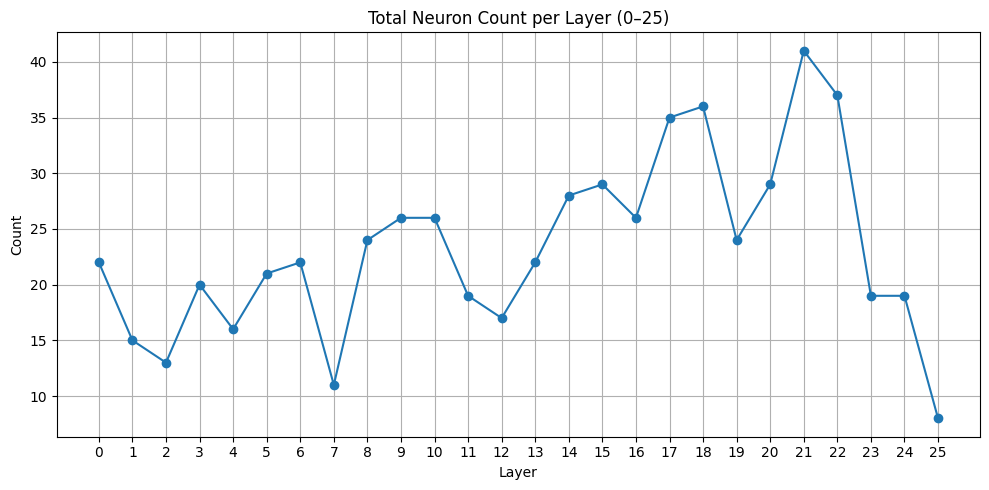

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `summary_df` is already created as in the previous step

# Sum layer counts across all files
layer_cols = [f'layer_{i}' for i in range(26)]
layer_totals = summary_df[layer_cols].sum()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(range(26), layer_totals.values, marker='o')
plt.xticks(range(26))
plt.title("Total Neuron Count per Layer (0–25)")
plt.xlabel("Layer")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()
